# First attempt at exploratory analysis

This file contains the code used for plotting the loglike distribution over time, and contains the first bits of analysis on the distribution of these values within the results.

We also start with exploring the top 10 highest probability structures in this file

In [1]:
import numpy as np
import matplotlib.pyplot as plt

min loglike: -1315030.0
max loglike: -1314820.0
mean loglike: -1314938.0293996325
stdev of loglike: 26.6874321153777


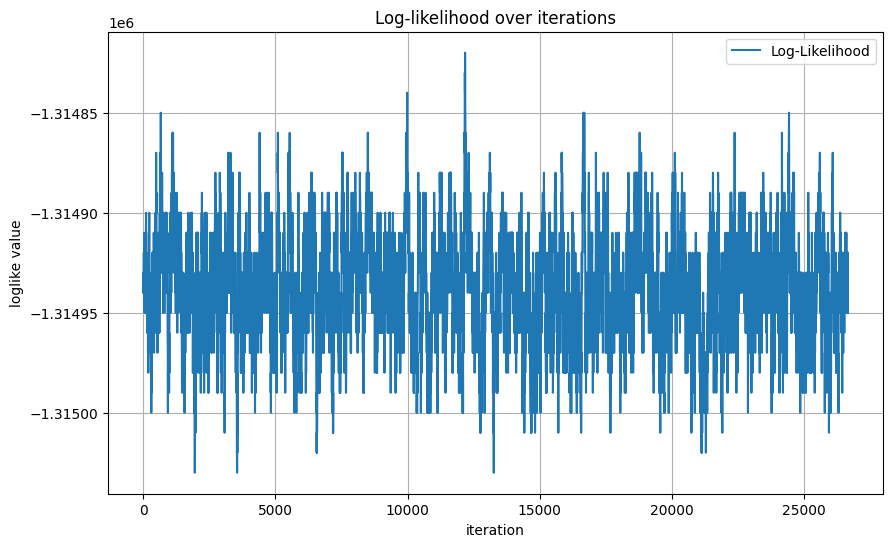

In [20]:
file_path = "data/FB pages/facebookPages_G_ll.txt" # loglike data
log_likelihood_values = np.loadtxt(file_path)

#statistics
print("min loglike:", np.min(log_likelihood_values))
print("max loglike:", np.max(log_likelihood_values))
print("mean loglike:", np.mean(log_likelihood_values))
print("stdev of loglike:", np.std(log_likelihood_values))

# Plotting log-likelihood values over iterations
plt.figure(figsize=(10, 6))
plt.plot(log_likelihood_values, label="Log-Likelihood")
plt.title("Log-likelihood over iterations")
plt.xlabel("iteration")
plt.ylabel("loglike value")
plt.legend()
plt.grid(True)
plt.show()

# Find all configs with highest loglike value

This requires there to be more than one different configuration with the same loglike value, like the clique file

In [21]:
with open("data/FB pages/facebookPages_G_configs.txt", "r") as file: # configs
    lines = file.readlines()
    
with open("data/FB pages/facebookPages_G_pairs.txt", "r") as pfile: # pairs
    pairs_lines = pfile.readlines()
        
max_loglike = np.max(log_likelihood_values)
print("Maximum Log-Likelihood:", max_loglike)
log_likelihood_values


Maximum Log-Likelihood: -1314820.0


array([-1314940., -1314940., -1314930., ..., -1314940., -1314940.,
       -1314950.])

In [22]:
def jaccard_similarity_line(line1, line2):
    set1 = set(line1.split())
    set2 = set(line2.split())
    
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    
    return intersection / union if union != 0 else 0

In [23]:
print (len(log_likelihood_values))
print (len(lines))

26667
26667


In [24]:
print (lines[0])
print (log_likelihood_values[0])

3 1 3 1 1 1 3 1 1 3 1 3 1 3 3 1 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 3 1 1 3 3 1 1 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 3 1 1 1 3 3 3 3 1 3 3 1 1 1 3 1 3 3 1 1 1 1 1 3 3 3 3 3 3 1 3 3 1 1 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 1 3 3 1 3 3 3 3 3 3 1 1 3 1 3 1 1 1 1 3 3 1 1 1 1 3 3 1 1 3 1 1 3 3 1 1 3 1 1 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 1 1 1 3 3 1 3 3 3 1 3 1 3 3 3 3 3 3 3 1 1 1 1 3 3 1 1 1 3 3 3 1 1 3 1 3 1 1 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 3 1 1 1 1 3 1 3 3 1 3 3 3 1 1 3 1 1 3 1 1 1 3 3 3 3 3 3 1 3 1 1 3 3 1 3 3 1 1 1 3 1 3 1 3 3 1 3 3 3 3 1 3 3 3 1 1 1 3 3 3 3 3 1 3 3 3 1 1 3 1 3 1 3 3 3 3 1 3 3 1 3 3 1 1 3 1 1 3 3 1 3 1 3 3 1 1 1 3 3 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 1 3 3 1 1 1 1 3 3 3 3 3 3 1 1 1 3 1 3 3 1 1 3 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 1 3 1 1 1 3 3 1 3 3 3 1 3 3 1 1 3 1 1 3 1 1 3 1 3 3 3 3 3 3 1 1 1 

In [25]:
structures = {}

for i in range(len(log_likelihood_values)):
    if log_likelihood_values[i] == max_loglike:
        structure = lines[i].strip()
        pairs = pairs_lines[i].strip()  # Assuming pairs_lines contains values from clique_cp_pairs.txt
        structures[structure] = pairs

for i, (structure, pairs) in enumerate(structures.items()):
    print(f"Index {i}: Structure: {structure}, Pairs: {pairs}")

Index 0: Structure: 3 1 3 1 1 1 3 1 1 3 1 3 1 3 3 1 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 3 1 1 3 3 1 1 3 3 1 3 3 1 3 3 3 1 3 1 3 3 3 3 1 1 1 3 3 3 3 1 3 3 1 1 1 3 1 3 3 1 1 1 1 1 3 3 3 3 3 3 1 3 3 1 1 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 1 3 1 1 1 1 3 3 1 1 1 1 3 3 1 1 3 1 1 3 3 1 1 3 1 1 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 1 1 1 3 3 1 3 3 3 1 3 1 3 3 3 3 3 3 3 1 1 1 1 3 3 1 1 1 3 3 3 1 1 3 1 3 1 1 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 3 1 1 1 1 3 1 3 3 1 3 3 3 1 1 3 1 1 3 1 1 1 3 3 3 3 3 3 1 3 1 1 3 3 1 3 3 1 1 1 3 1 3 1 3 3 1 3 3 3 3 1 3 3 3 1 1 1 3 3 3 3 3 1 3 3 1 1 1 3 1 3 1 3 3 3 3 1 3 3 1 3 3 1 1 3 1 1 3 3 1 3 1 3 3 1 1 1 3 3 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 1 3 3 1 1 1 1 3 3 3 3 3 3 1 1 1 3 3 1 3 1 1 3 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 1 3 1 1 1 3 3 1 1 3 3 1 3 3 1 1 3 1 1 3 1 1 3 

In [26]:
structures = set() # set so we only get unique structures

for i in range(len(log_likelihood_values)):
    if log_likelihood_values[i] == max_loglike:
        structure = lines[i].strip()  # Remove leading/trailing whitespaces
        structures.add(structure)

structures_list = list(structures)

for i, structure in enumerate(structures_list):
    print(f"Index {i}: {structure}")

Index 0: 3 1 3 1 1 1 3 1 1 3 1 3 1 3 3 1 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 3 1 1 3 3 1 1 3 3 1 3 3 1 3 3 3 1 3 1 3 3 3 3 1 1 1 3 3 3 3 1 3 3 1 1 1 3 1 3 3 1 1 1 1 1 3 3 3 3 3 3 1 3 3 1 1 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 1 3 1 1 1 1 3 3 1 1 1 1 3 3 1 1 3 1 1 3 3 1 1 3 1 1 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 1 1 1 3 3 1 3 3 3 1 3 1 3 3 3 3 3 3 3 1 1 1 1 3 3 1 1 1 3 3 3 1 1 3 1 3 1 1 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 3 1 1 1 1 3 1 3 3 1 3 3 3 1 1 3 1 1 3 1 1 1 3 3 3 3 3 3 1 3 1 1 3 3 1 3 3 1 1 1 3 1 3 1 3 3 1 3 3 3 3 1 3 3 3 1 1 1 3 3 3 3 3 1 3 3 1 1 1 3 1 3 1 3 3 3 3 1 3 3 1 3 3 1 1 3 1 1 3 3 1 3 1 3 3 1 1 1 3 3 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 1 3 3 1 1 1 1 3 3 3 3 3 3 1 1 1 3 3 1 3 1 1 3 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 1 3 1 1 1 3 3 1 1 3 3 1 3 3 1 1 3 1 1 3 1 1 3 1 3 3 3 3 3

In [27]:
len(structures_list)

1

In [28]:
structures_info = {}  # Dictionary to store structure, count, and indexes

for i in range(len(log_likelihood_values)):
    if log_likelihood_values[i] == max_loglike:
        structure = lines[i].strip()  # Remove leading/trailing whitespaces

        if structure in structures_info:
            # Increment count
            structures_info[structure]['count'] += 1
            # Append index
            structures_info[structure]['indexes'].append(i)
        else:
            # Add new entry
            structures_info[structure] = {'count': 1, 'indexes': [i]}

for i, (structure, info) in enumerate(structures_info.items()):
    print(f"Index {i}: Structure: {structure}, Count: {info['count']}, Indexes: {info['indexes']}")


Index 0: Structure: 3 1 3 1 1 1 3 1 1 3 1 3 1 3 3 1 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 3 1 1 3 3 1 1 3 3 1 3 3 1 3 3 3 1 3 1 3 3 3 3 1 1 1 3 3 3 3 1 3 3 1 1 1 3 1 3 3 1 1 1 1 1 3 3 3 3 3 3 1 3 3 1 1 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 1 3 1 1 1 1 3 3 1 1 1 1 3 3 1 1 3 1 1 3 3 1 1 3 1 1 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 1 1 1 3 3 1 3 3 3 1 3 1 3 3 3 3 3 3 3 1 1 1 1 3 3 1 1 1 3 3 3 1 1 3 1 3 1 1 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 3 1 1 1 1 3 1 3 3 1 3 3 3 1 1 3 1 1 3 1 1 1 3 3 3 3 3 3 1 3 1 1 3 3 1 3 3 1 1 1 3 1 3 1 3 3 1 3 3 3 3 1 3 3 3 1 1 1 3 3 3 3 3 1 3 3 1 1 1 3 1 3 1 3 3 3 3 1 3 3 1 3 3 1 1 3 1 1 3 3 1 3 1 3 3 1 1 1 3 3 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 1 3 3 1 1 1 1 3 3 3 3 3 3 1 1 1 3 3 1 3 1 1 3 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 1 3 1 1 1 3 3 1 1 3 3 1 3 3 1 1 3 1 1 3 1 1 3 

In [29]:
# take average of counts in structures_info
counts = [info['count'] for info in structures_info.values()]
avg_count = np.mean(counts)
print(f"Average count: {avg_count}")

Average count: 1.0


In [30]:
# keep structures with count >= avg_count in a new dictionary
structures_info_filtered = {}

for structure, info in structures_info.items():
    if info['count'] >= avg_count:
        structures_info_filtered[structure] = info
        
for i, (structure, info) in enumerate(structures_info_filtered.items()):
    print(f"Index {i}: Structure: {structure}, Count: {info['count']}, Indexes: {info['indexes']}")

Index 0: Structure: 3 1 3 1 1 1 3 1 1 3 1 3 1 3 3 1 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 3 1 1 3 3 1 1 3 3 1 3 3 1 3 3 3 1 3 1 3 3 3 3 1 1 1 3 3 3 3 1 3 3 1 1 1 3 1 3 3 1 1 1 1 1 3 3 3 3 3 3 1 3 3 1 1 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 1 3 1 1 1 1 3 3 1 1 1 1 3 3 1 1 3 1 1 3 3 1 1 3 1 1 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 1 1 1 3 3 1 3 3 3 1 3 1 3 3 3 3 3 3 3 1 1 1 1 3 3 1 1 1 3 3 3 1 1 3 1 3 1 1 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 3 1 1 1 1 3 1 3 3 1 3 3 3 1 1 3 1 1 3 1 1 1 3 3 3 3 3 3 1 3 1 1 3 3 1 3 3 1 1 1 3 1 3 1 3 3 1 3 3 3 3 1 3 3 3 1 1 1 3 3 3 3 3 1 3 3 1 1 1 3 1 3 1 3 3 3 3 1 3 3 1 3 3 1 1 3 1 1 3 3 1 3 1 3 3 1 1 1 3 3 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 1 3 3 1 1 1 1 3 3 3 3 3 3 1 1 1 3 3 1 3 1 1 3 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 1 3 1 1 1 3 3 1 1 3 3 1 3 3 1 1 3 1 1 3 1 1 3 

In [31]:
# create a list of structures again, so we can get binary values
temp_lines = []
for i, (structure, info) in enumerate(structures_info_filtered.items()):
    temp_lines.append(structure)

In [32]:
binary_lines = {}

# convert to binary, store in dictionary
for i in range(len(temp_lines)):
    # print (i)
    temp = ''
    # print (bin(int(i))[2:])
    for j in temp_lines[i].split():
        # print(bin(int(j))[2:])
        # binary_lines.append(bin(int(i))[2:])
        temp += f'{bin(int(j))[2:]} '
    binary_lines[i] = temp

In [33]:
total_similarity = 0
pair_count = 0

# test jaccard sim for the filtered structures
for i in range(len(temp_lines[-5:])):
    for j in range(i + 1, len(temp_lines[-5:])):
        #JS for each pair of lines
        similarity = jaccard_similarity_line(binary_lines[i], binary_lines[j])
        
        #sum similarity 
        total_similarity += similarity
        pair_count += 1

#average similarity
average_similarity = total_similarity / pair_count if pair_count != 0 else 0

print(f"Average JS: {average_similarity}")


Average JS: 0


# Top 10 highest config values

In [34]:
# show top 10 log-likelihood values and their iteration
top_10_indices = np.argsort(log_likelihood_values)[-10:]
print("Top 10 log-likelihood values and their iteration:")
print("iteration\tloglike")
for i in top_10_indices:
    print(i, "\t\t", log_likelihood_values[i])

Top 10 log-likelihood values and their iteration:
iteration	loglike
12164 		 -1314840.0
9984 		 -1314840.0
12179 		 -1314840.0
12180 		 -1314840.0
12166 		 -1314830.0
12177 		 -1314830.0
12178 		 -1314830.0
12175 		 -1314830.0
12165 		 -1314830.0
12176 		 -1314820.0


In [35]:
# get the configs for the top 10 log-likelihood values
top_10_configs = []
for i in top_10_indices:
    top_10_configs.append(lines[i].strip())
print("Top 10 configs:")
for i in top_10_configs:
    print(i)



Top 10 configs:
3 1 3 1 1 1 3 1 1 3 1 3 1 3 3 1 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 3 1 1 3 3 1 1 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 3 1 1 1 3 3 3 3 1 3 3 1 1 1 3 1 3 3 1 1 1 1 1 3 3 3 3 3 3 1 3 3 1 1 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 1 3 1 1 1 1 3 3 1 1 1 1 3 3 1 1 3 1 1 3 3 1 1 3 1 1 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 1 1 1 3 3 1 3 3 3 1 3 1 3 3 3 3 3 3 3 1 1 1 1 3 3 1 1 1 3 3 3 1 1 3 1 3 1 1 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 3 1 1 1 1 3 1 3 3 1 3 3 3 1 1 3 1 1 3 1 1 1 3 3 3 3 3 3 1 3 1 1 3 3 1 3 3 1 1 1 3 1 3 1 3 3 1 3 3 3 3 1 3 3 3 1 1 1 3 3 3 3 3 1 3 3 1 1 1 3 1 3 1 3 3 3 3 1 3 3 1 3 3 1 1 3 1 1 3 3 1 3 1 3 3 1 1 1 3 3 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 3 3 1 3 3 1 1 1 1 3 3 3 3 3 3 1 1 1 3 1 3 3 1 1 3 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 1 3 1 1 1 3 3 1 1 3 3 1 3 3 1 1 3 1 1 3 1 1 3 1 3 

In [36]:
# convert to binary, store in dictionary
binary_lines = {}

for i in range(len(top_10_configs)):
    # print (i)
    temp = ''
    # print (bin(int(i))[2:])
    for j in top_10_configs[i].split():
        # print(bin(int(j))[2:])
        # binary_lines.append(bin(int(i))[2:])
        temp += f'{bin(int(j))[2:]} '
    binary_lines[i] = temp

In [37]:
total_similarity = 0
pair_count = 0

# test jaccard sim for the top 10 configs
for i in range(len(top_10_configs)):
    for j in range(i + 1, len(top_10_configs)):
        #JS for each pair of lines
        similarity = jaccard_similarity_line(binary_lines[i], binary_lines[j])
        
        #sum similarity 
        total_similarity += similarity
        pair_count += 1

#average similarity
average_similarity = total_similarity / pair_count if pair_count != 0 else 0

print(f"Average JS: {average_similarity}")

Average JS: 1.0
